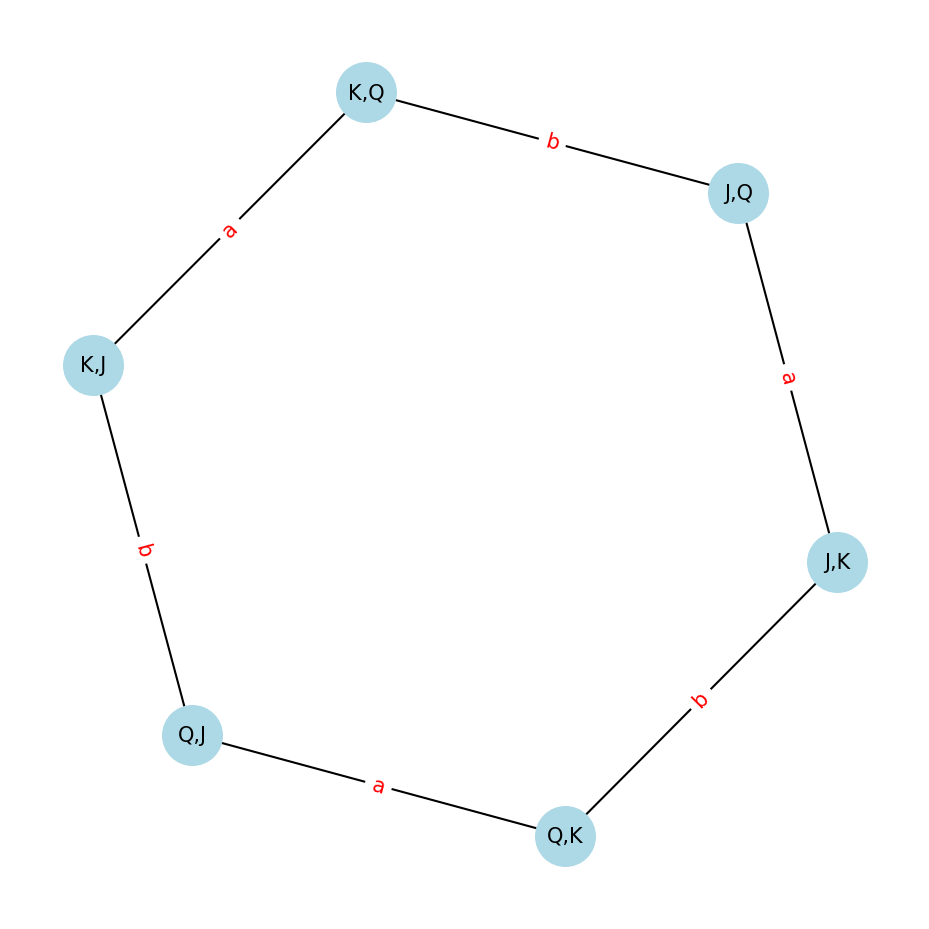

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# define worlds
worlds = [("J","Q"),("J","K"),("Q","J"),("Q","K"),("K","J"),("K","Q")]

G = nx.Graph()

# add nodes with labels
for i, (c1, c2) in enumerate(worlds):
    G.add_node(i, label=f"{c1},{c2}")

# add edges for P1 indistinguishability
for i,(c1_i, _) in enumerate(worlds):
    for j,(c1_j, _) in enumerate(worlds):
        if i<j and c1_i==c1_j:
            G.add_edge(i,j,label="a")

# add edges for P2 indistinguishability
for i,(_, c2_i) in enumerate(worlds):
    for j,(_, c2_j) in enumerate(worlds):
        if i<j and c2_i==c2_j:
            G.add_edge(i,j,label="b")

# draw
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, labels={i:G.nodes[i]['label'] for i in G.nodes()}, node_color="lightblue", node_size=800, font_size=10)
edge_labels = {(u,v):d['label'] for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("")
plt.axis('off')
plt.show()


/var/folders/28/kc57lyz94jv362k5c1_xgwt00000gn/T/ipykernel_89941/3238865867.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


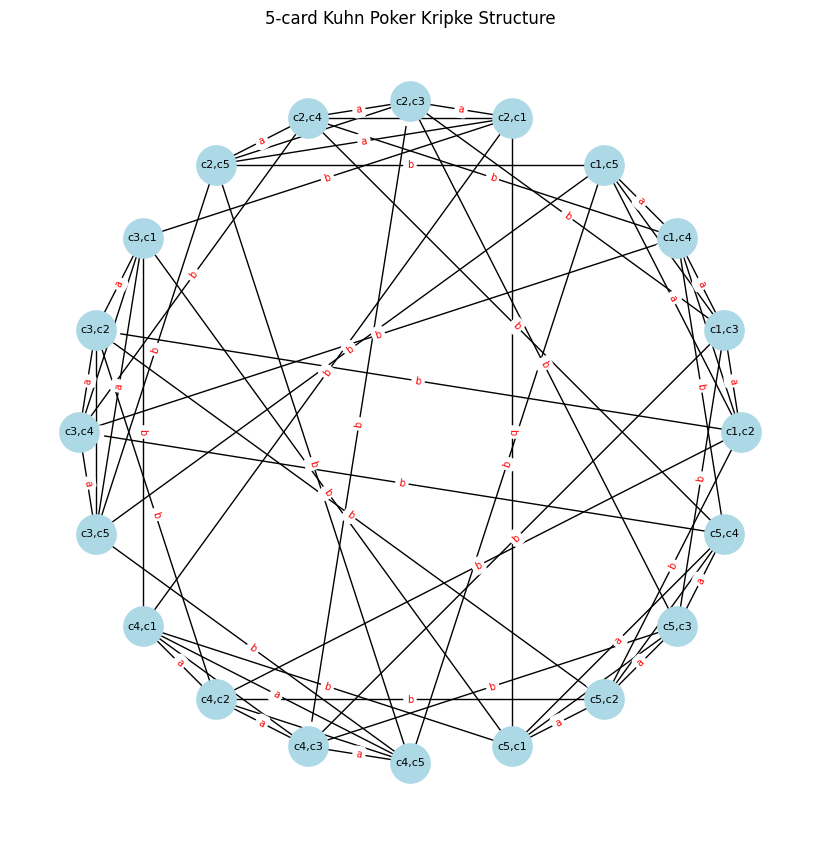

In [ ]:
# 5-card Kuhn-like game
cards = ["c1", "c2", "c3", "c4", "c5"]

# All ordered deals (a card, b card), a ≠ b
worlds_5 = [(c1, c2) for c1 in cards for c2 in cards if c1 != c2]

G5 = nx.Graph()

# Add nodes with labels like "c1,c2"
for i, (c1, c2) in enumerate(worlds_5):
    G5.add_node(i, label=f"{c1},{c2}")

# Alice's uncertainty (same a card) -> edges labeled "a"
for i, (c1_i, _) in enumerate(worlds_5):
    for j, (c1_j, _) in enumerate(worlds_5):
        if i < j and c1_i == c1_j:
            G5.add_edge(i, j, label="a")

# Bob's uncertainty (same b card) -> edges labeled "b"
for i, (_, c2_i) in enumerate(worlds_5):
    for j, (_, c2_j) in enumerate(worlds_5):
        if i < j and c2_i == c2_j:
            # If there is already an 'a' edge from above, just add another label
            if G5.has_edge(i, j):
                # store both labels (a,b) if you like; here we just set "b"
                G5[i][j]['label'] = "b"
            else:
                G5.add_edge(i, j, label="b")

# Layout: circular works reasonably well for 20 nodes
pos = nx.circular_layout(G5)

plt.figure(figsize=(8, 8))
nx.draw(
    G5, pos,
    with_labels=True,
    labels={i: G5.nodes[i]['label'] for i in G5.nodes()},
    node_color="lightblue",
    node_size=800,
    font_size=8
)

edge_labels = {(u, v): d['label'] for u, v, d in G5.edges(data=True)}
nx.draw_networkx_edge_labels(G5, pos, edge_labels=edge_labels,
                             font_color='red', font_size=7)

plt.title("5-card Kuhn Poker Kripke Structure")
plt.axis('off')
plt.tight_layout()
plt.show()


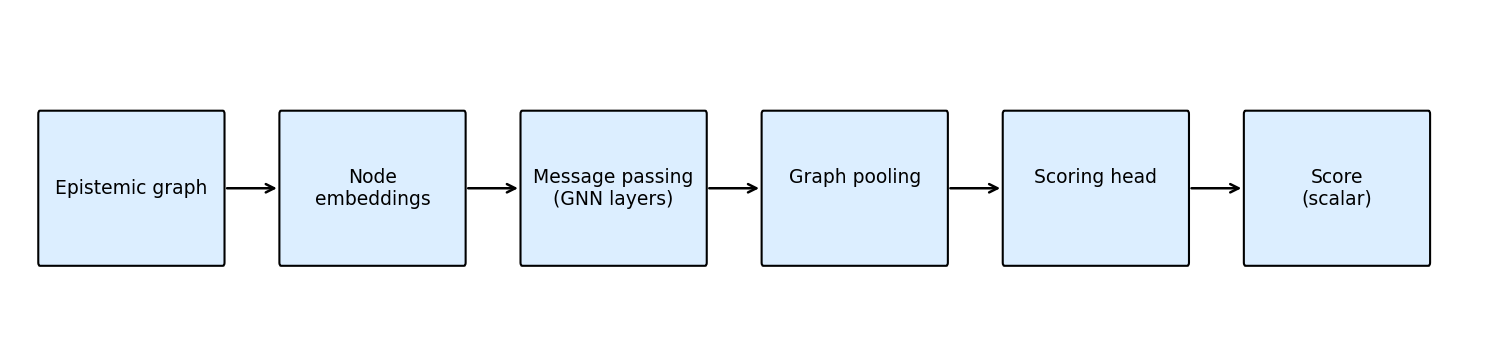

In [ ]:
from matplotlib.patches import FancyBboxPatch

plt.rcParams["figure.dpi"] = 150

fig, ax = plt.subplots(figsize=(10, 2.5))
ax.axis("off")

def add_box(x, y, text, w=2.2, h=0.9):
    """Add a rounded box and return its (x, y, w, h)."""
    box = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#dceeff"
    )
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text,
            ha="center", va="center", fontsize=9)
    return x, y, w, h

y = 0.5         # vertical position of all boxes
gap = 0.7       # horizontal gap between boxes
w = 2.2
h = 0.9

# x positions of boxes
x0 = 0.3
x1 = x0 + w + gap
x2 = x1 + w + gap
x3 = x2 + w + gap
x4 = x3 + w + gap
x5 = x4 + w + gap

# create boxes
b0 = add_box(x0, y, "Epistemic graph", w, h)
b1 = add_box(x1, y, "Node\nembeddings", w, h)
b2 = add_box(x2, y, "Message passing\n(GNN layers)", w, h)
b3 = add_box(x3, y, "Graph pooling\n", w, h)
b4 = add_box(x4, y, "Scoring head\n", w, h)
b5 = add_box(x5, y, "Score\n(scalar)", w, h)

boxes = [b0, b1, b2, b3, b4, b5]

# draw arrows between box i and box i+1
for (xi, yi, wi, hi), (xj, yj, wj, hj) in zip(boxes[:-1], boxes[1:]):
    # start at right edge of box i
    start = (xi + wi, yi + hi/2)
    # end at left edge of box j
    end = (xj, yj + hj/2)
    ax.annotate(
        "",
        xy=end,
        xytext=start,
        arrowprops=dict(arrowstyle="->", lw=1.2)
    )

plt.title("", fontsize=11)
ax.set_xlim(0, x5 + w + 0.5)
ax.set_ylim(0, 2)
plt.tight_layout()
plt.show()
